# **CVPS20 // Addressing Overfitting in MLPs**

*October 27, 2020*

This notebook will explore weight regularization as a method for controlling overfitting.

---

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [3]:
# plt.style.use("seaborn-dark")
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

---

Load the hand-written digits data,

In [7]:
# -- load in the hand-written digits data set
fname = "/content/drive/My Drive/cvps20/data/examples/digits.png"
digits = np.asarray(iio.v2.imread(fname)) / 255.

# -- get a list of individual numbers (note they are 20x20 pixels)
nums = digits.reshape(50, 20, 100, 20).transpose(0, 2, 1, 3).reshape(5000, 20, 20)

# -- create features array [NOTE THE .copy()]
nimg = nums.shape[0]
nrow = nums.shape[1]
ncol = nums.shape[2]
feat = nums.reshape(nimg, nrow * ncol).copy()

# -- set the target
targ = np.concatenate((np.full(500, 0), np.full(500, 1), np.full(500, 2),
                       np.full(500, 3), np.full(500, 4), np.full(500, 5),
                       np.full(500, 6), np.full(500, 7), np.full(500, 8),
                       np.full(500, 9)))

In [9]:
# -- create a training/testing sample
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, test_size=0.2, random_state=302)

print("number of training examples : {0}".format(targ_tr.size))
print("number of testing examples  : {0}".format(targ_te.size))

number of training examples : 4000
number of testing examples  : 1000


Let's train a **Multi-layer Perceptron classifier**,

In [12]:
# -- instantiate an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=500)

# -- train it
mlp.fit(feat_tr, targ_tr)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=10, max_iter=500)

training accuracy : 0.99975
testing accuracy : 0.896
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       109
           1       0.98      0.97      0.97        92
           2       0.88      0.87      0.87        98
           3       0.85      0.88      0.87        95
           4       0.93      0.94      0.93       110
           5       0.84      0.84      0.84        93
           6       0.90      0.92      0.91       106
           7       0.88      0.89      0.89        91
           8       0.89      0.80      0.85       102
           9       0.88      0.88      0.88       104

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.89      1000
weighted avg       0.90      0.90      0.90      1000



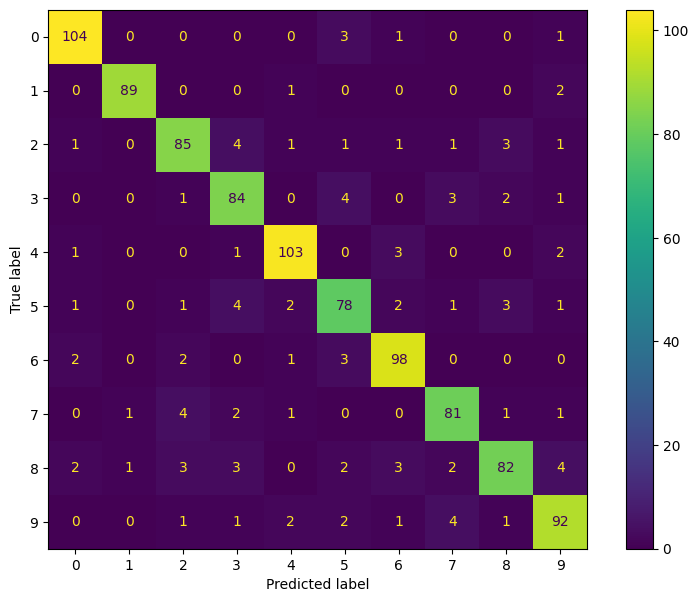

In [13]:
# -- predict
pred_tr = mlp.predict(feat_tr)
pred_te = mlp.predict(feat_te)

# -- print accuracy
acc_tr = accuracy_score(targ_tr, pred_tr)
acc_te = accuracy_score(targ_te, pred_te)

print("training accuracy : {0}".format(acc_tr))
print("testing accuracy : {0}".format(acc_te))

# -- evaluate performance metrics
ConfusionMatrixDisplay.from_predictions(targ_te, pred_te)
print(classification_report(targ_te, pred_te))

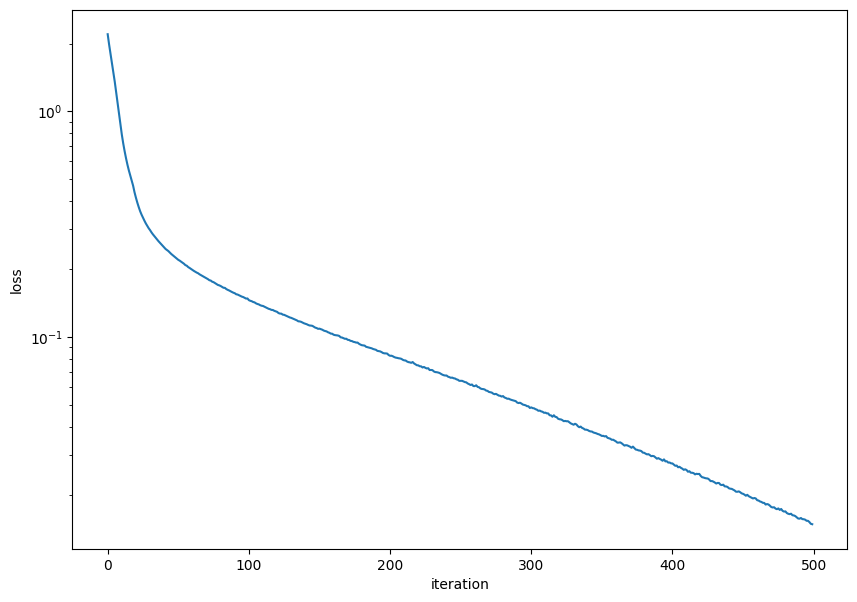

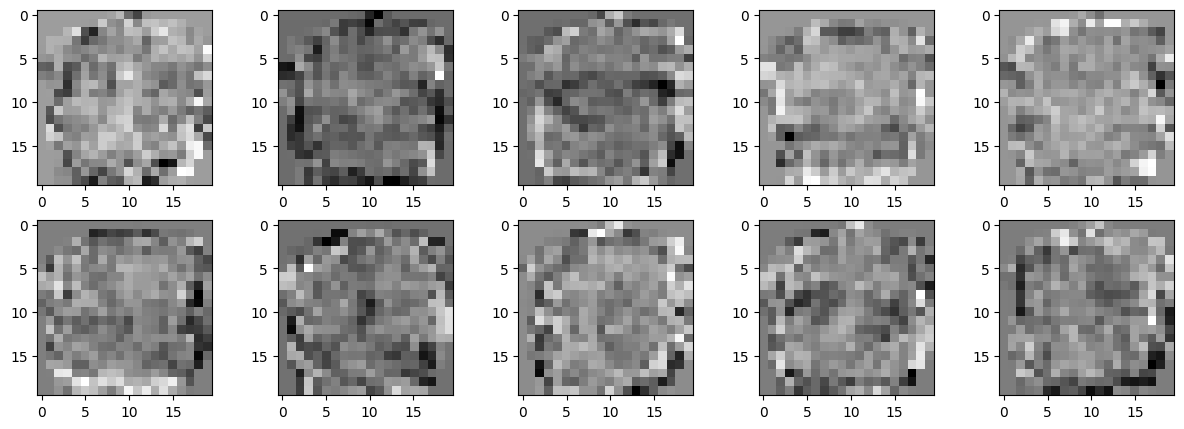

In [14]:
# -- plot the loss function
fig, ax = plt.subplots()
ax.plot(mlp.loss_curve_)
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
ax.set_yscale("log")
fig.show()

# -- visualize the weights
ww = mlp.coefs_[0].reshape(20, 20, 10)

fig, ax = plt.subplots(2, 5, figsize=[15, 5])
for ii in range(10):
  ax[ii // 5, ii % 5].imshow(ww[:, :, ii])

In [15]:
# -- instantiate an MLP classifier with more neurons
mlp = MLPClassifier(hidden_layer_sizes=(100), max_iter=500)

# -- train it
mlp.fit(feat_tr, targ_tr)

MLPClassifier(hidden_layer_sizes=100, max_iter=500)

In [16]:
# -- predict
pred_tr = mlp.predict(feat_tr)
pred_te = mlp.predict(feat_te)

# -- print accuracy
acc_tr = accuracy_score(targ_tr, pred_tr)
acc_te = accuracy_score(targ_te, pred_te)

print("training accuracy : {0}".format(acc_tr))
print("testing accuracy : {0}".format(acc_te))

training accuracy : 1.0
testing accuracy : 0.933


In [17]:
mlp.coefs_[0].shape

(400, 100)

In [19]:
mlp.coefs_[1].shape

(100, 10)

In [1]:
mlp.intercepts_[0].shape

NameError: name 'mlp' is not defined

In [20]:
mlp.coefs_[1]

array([[ 4.85582449e-01, -1.99504590e-01, -2.87163438e-02,
        -1.00024556e+00, -2.45456905e-02, -8.77313655e-01,
         4.05465644e-01, -7.19216422e-02,  3.36090723e-01,
         4.35959812e-01],
       [ 9.63965679e-02, -4.19112263e-02,  5.44733497e-01,
        -7.20379028e-01,  5.85021493e-03,  1.27181455e-02,
         3.73401204e-01,  5.34470327e-01, -6.48831695e-01,
        -8.18887073e-01],
       [-2.36990874e-01,  1.47410658e-01,  2.37222309e-01,
         3.95786252e-01, -5.57460794e-01,  2.14714655e-01,
        -4.68701635e-01,  1.40365485e-01,  8.34907596e-02,
        -3.29546199e-01],
       [-1.68091441e-01,  4.81776901e-01, -1.88966697e-01,
        -6.68160979e-01, -1.52973748e-02,  6.50720910e-01,
        -3.85778896e-01, -3.26687875e-01, -7.70981227e-01,
         7.17584269e-01],
       [ 6.52618613e-02,  1.70571529e-01, -7.61996147e-01,
         4.33709964e-01, -5.33952372e-01, -1.40103817e+00,
         8.31652263e-01,  4.61112383e-01, -6.16082399e-01,
        -6.

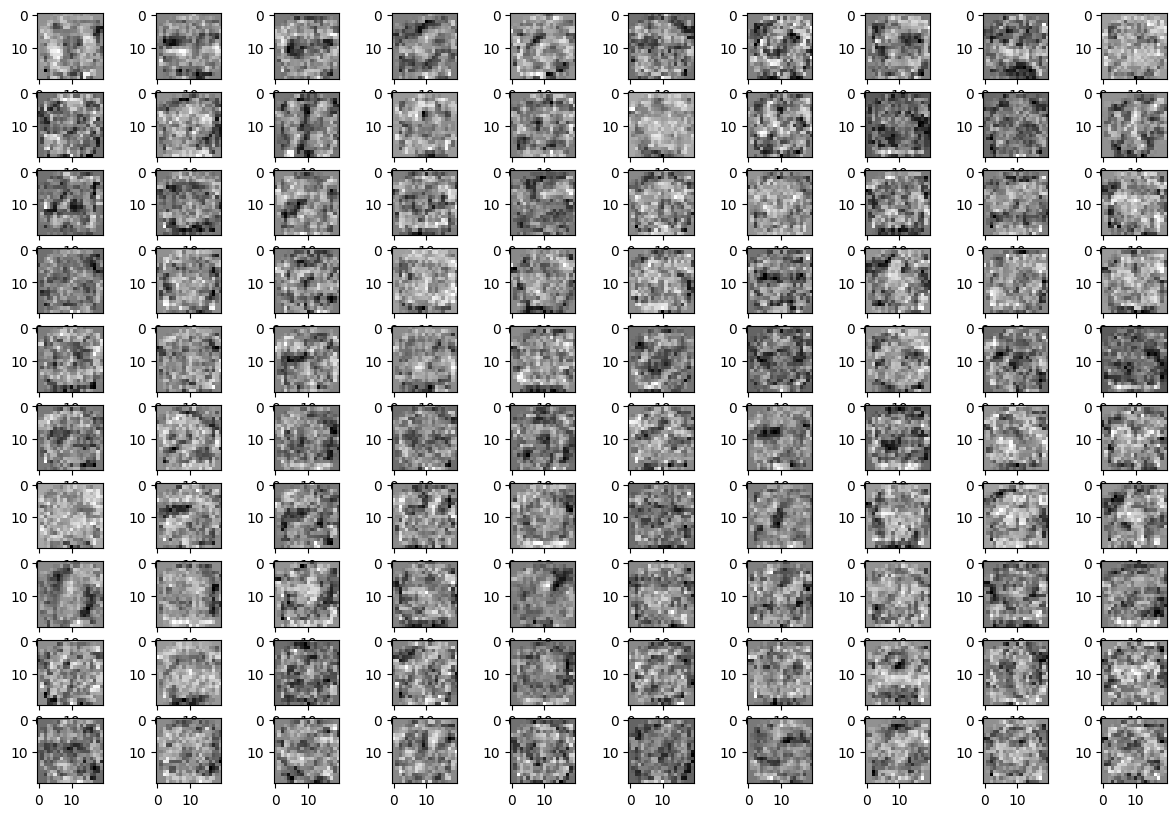

In [18]:
# -- visualize the weights
ww = mlp.coefs_[0].reshape(20, 20, 100)

fig, ax = plt.subplots(10, 10, figsize=[15, 10])
for ii in range(100):
  ax[ii // 10, ii % 10].imshow(ww[:, :, ii])

This model is clearly overfit.  Let's use weight regularization to reduce the model flexibility,

In [ ]:
# -- instantiate an MLP classifier with more neurons
mlp = MLPClassifier(hidden_layer_sizes=(100), max_iter=500, alpha=2)

# -- train it
mlp.fit(feat_tr, targ_tr)

# -- predict
pred_tr = mlp.predict(feat_tr)
pred_te = mlp.predict(feat_te)

# -- print accuracy
acc_tr = accuracy_score(targ_tr, pred_tr)
acc_te = accuracy_score(targ_te, pred_te)

print("training accuracy : {0}".format(acc_tr))
print("testing accuracy : {0}".format(acc_te))

training accuracy : 0.94275
testing accuracy : 0.906


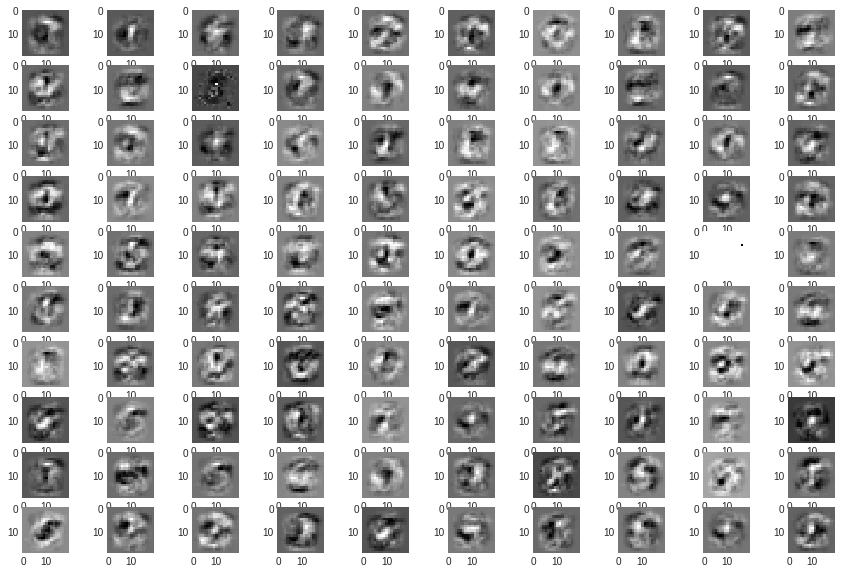

In [ ]:
# -- visualize the weights
ww = mlp.coefs_[0].reshape(20, 20, 100)

fig, ax = plt.subplots(10, 10, figsize=[15, 10])
for ii in range(100):
  ax[ii // 10, ii % 10].imshow(ww[:, :, ii])

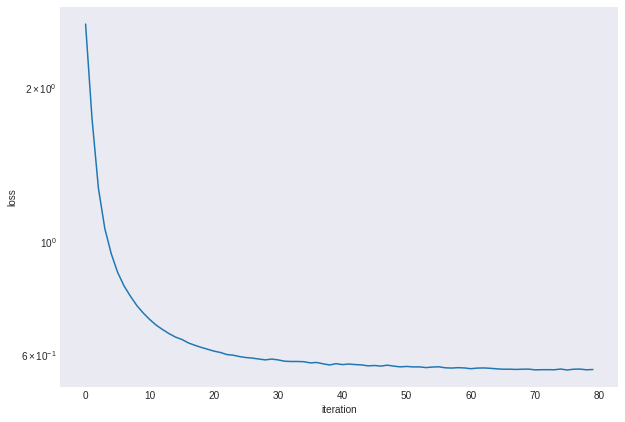

In [ ]:
# -- plot the loss function
fig, ax = plt.subplots()
ax.plot(mlp.loss_curve_)
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
ax.set_yscale("log")
fig.show()

In [ ]:
# -- instantiate a deeper MLP classifier
mlp =

# -- train it
mlp.fit(feat_tr, targ_tr)

# -- predict
pred_tr = mlp.predict(feat_tr)
pred_te = mlp.predict(feat_te)

# -- print accuracy
acc_tr = accuracy_score(targ_tr, pred_tr)
acc_te = accuracy_score(targ_te, pred_te)

print("training accuracy : {0}".format(acc_tr))
print("training accuracy : {0}".format(acc_te))

# -- plot the loss function
fig, ax = plt.subplots()
ax.plot(mlp.loss_curve_)
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
ax.set_yscale("log")
fig.show()